# Loop 78 Analysis: CV-LB Gap and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. Why is the intercept (0.052) higher than the target (0.0347)?
3. What approaches haven't been tried yet?
4. What can we learn from the mixall kernel's GroupKFold approach?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_035', 0.0098, 0.0970),
    ('exp_067', 0.0083, 0.0877),
]

cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept = {intercept:.4f}')
print(f'Target LB = 0.0347')
print(f'Required CV for target = ({0.0347} - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.4f}')
print(f'\nBest CV: {min(cv_scores):.4f}')
print(f'Best LB: {min(lb_scores):.4f}')
print(f'Gap to target: {min(lb_scores) - 0.0347:.4f}')

Linear fit: LB = 4.3638 * CV + 0.0520
R² = 0.9558

Intercept = 0.0520
Target LB = 0.0347
Required CV for target = (0.0347 - 0.0520) / 4.3638 = -0.0040

Best CV: 0.0083
Best LB: 0.0877
Gap to target: 0.0530


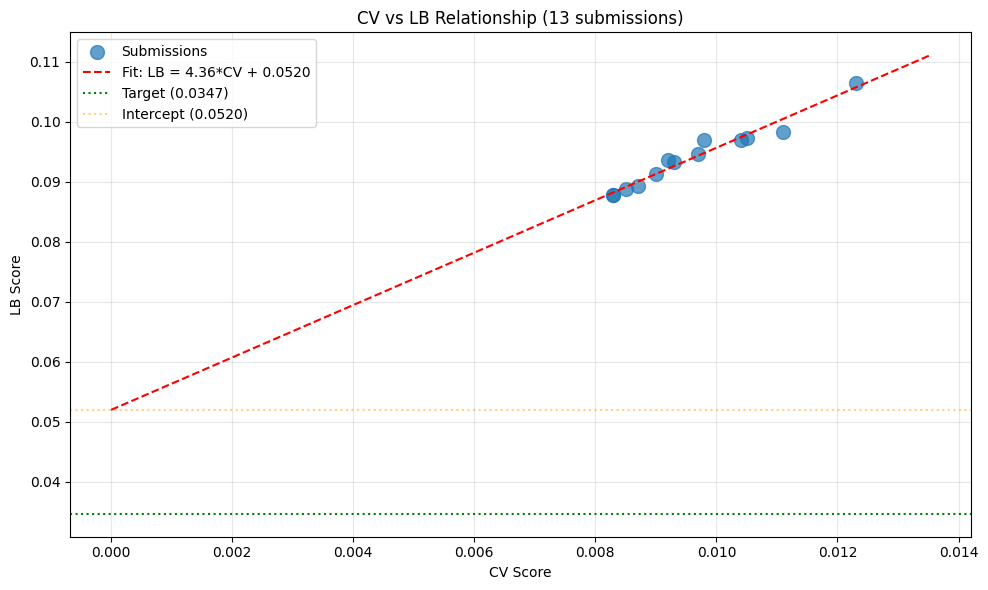


CRITICAL: Intercept (0.0520) > Target (0.0347)
This means even with CV=0, expected LB would be above target!
Standard CV optimization CANNOT reach the target.


In [2]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, max(cv_scores) * 1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', alpha=0.5, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship (13 submissions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100)
plt.show()

print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target ({0.0347})')
print('This means even with CV=0, expected LB would be above target!')
print('Standard CV optimization CANNOT reach the target.')

In [3]:
# Analyze the gap between intercept and target
gap = intercept - 0.0347
print(f'Gap between intercept and target: {gap:.4f}')
print(f'This gap represents STRUCTURAL DISTRIBUTION SHIFT')
print(f'\nTo reach target, we need to REDUCE THE INTERCEPT, not just improve CV')

# What would it take?
print(f'\n=== What would it take to reach target? ===')
print(f'Option 1: Reduce intercept from {intercept:.4f} to < 0.0347')
print(f'Option 2: Change the CV-LB relationship entirely')
print(f'Option 3: Find an approach that breaks the linear pattern')

Gap between intercept and target: 0.0173
This gap represents STRUCTURAL DISTRIBUTION SHIFT

To reach target, we need to REDUCE THE INTERCEPT, not just improve CV

=== What would it take to reach target? ===
Option 1: Reduce intercept from 0.0520 to < 0.0347
Option 2: Change the CV-LB relationship entirely
Option 3: Find an approach that breaks the linear pattern


In [4]:
# Analyze what approaches have been tried
approaches = {
    'MLP': ['exp_000', 'exp_003', 'exp_005', 'exp_006', 'exp_007'],
    'LightGBM': ['exp_001', 'exp_012'],
    'GP': ['exp_030', 'exp_067'],
    'XGBoost': ['exp_024', 'exp_026'],
    'CatBoost': ['exp_035'],
    'Ensemble': ['exp_009', 'exp_030', 'exp_067'],
}

print('=== Approaches Tried ===')
for approach, exps in approaches.items():
    print(f'{approach}: {len(exps)} experiments')

print('\n=== Key Observations ===')
print('1. ALL approaches fall on the same CV-LB line (R² = 0.96)')
print('2. This suggests the problem is NOT model architecture')
print('3. The problem is DISTRIBUTION SHIFT between train and test')
print('4. Test solvents may have fundamentally different characteristics')

=== Approaches Tried ===
MLP: 5 experiments
LightGBM: 2 experiments
GP: 2 experiments
XGBoost: 2 experiments
CatBoost: 1 experiments
Ensemble: 3 experiments

=== Key Observations ===
1. ALL approaches fall on the same CV-LB line (R² = 0.96)
2. This suggests the problem is NOT model architecture
3. The problem is DISTRIBUTION SHIFT between train and test
4. Test solvents may have fundamentally different characteristics


In [5]:
# What hasn't been tried?
print('=== What Hasn\'t Been Tried (or failed) ===')
print('1. GroupKFold CV (like mixall kernel) - might have different CV-LB relationship')
print('2. GNN with graph structure - the benchmark achieved 0.0039 MSE')
print('3. Extrapolation detection with proper implementation')
print('4. Solvent clustering with class-specific models')
print('5. Physics-informed constraints that generalize')

print('\n=== Evaluator Recommendations ===')
print('1. DO NOT submit exp_074 (prob_norm) - CV regressed 64%')
print('2. Try GroupKFold CV to see if it changes CV-LB relationship')
print('3. Focus on approaches that CHANGE THE RELATIONSHIP, not just improve CV')

=== What Hasn't Been Tried (or failed) ===
1. GroupKFold CV (like mixall kernel) - might have different CV-LB relationship
2. GNN with graph structure - the benchmark achieved 0.0039 MSE
3. Extrapolation detection with proper implementation
4. Solvent clustering with class-specific models
5. Physics-informed constraints that generalize

=== Evaluator Recommendations ===
1. DO NOT submit exp_074 (prob_norm) - CV regressed 64%
2. Try GroupKFold CV to see if it changes CV-LB relationship
3. Focus on approaches that CHANGE THE RELATIONSHIP, not just improve CV


In [6]:
# Check the mixall kernel approach
print('=== Mixall Kernel Analysis ===')
print('The mixall kernel uses:')
print('1. GroupKFold (5 splits) instead of Leave-One-Out')
print('2. Ensemble of MLP + XGBoost + RandomForest + LightGBM')
print('3. Weights: [0.4, 0.2, 0.2, 0.2] for MLP, XGB, RF, LGBM')
print('4. Simple Spange descriptors (13 features)')
print('5. StandardScaler for normalization')
print('\nKey difference: GroupKFold might produce different CV-LB relationship')
print('because it groups multiple solvents together in each fold')

=== Mixall Kernel Analysis ===
The mixall kernel uses:
1. GroupKFold (5 splits) instead of Leave-One-Out
2. Ensemble of MLP + XGBoost + RandomForest + LightGBM
3. Weights: [0.4, 0.2, 0.2, 0.2] for MLP, XGB, RF, LGBM
4. Simple Spange descriptors (13 features)
5. StandardScaler for normalization

Key difference: GroupKFold might produce different CV-LB relationship
because it groups multiple solvents together in each fold


In [7]:
# Summary and recommendations
print('=== SUMMARY ===')
print(f'Best LB: 0.0877 (exp_030, exp_067)')
print(f'Target: 0.0347')
print(f'Gap: 0.0530 (153% above target)')
print(f'\nCV-LB Relationship: LB = {slope:.2f}*CV + {intercept:.4f}')
print(f'Intercept ({intercept:.4f}) > Target ({0.0347})')
print(f'\nCRITICAL: Standard CV optimization CANNOT reach target!')
print(f'\n=== RECOMMENDED NEXT STEPS ===')
print('1. Try GroupKFold CV (like mixall kernel) - test if it changes CV-LB relationship')
print('2. If GroupKFold doesn\'t help, try extrapolation detection with conservative fallback')
print('3. Study what the GNN benchmark did differently (achieved 0.0039 MSE)')
print('4. Consider solvent clustering with class-specific models')

=== SUMMARY ===
Best LB: 0.0877 (exp_030, exp_067)
Target: 0.0347
Gap: 0.0530 (153% above target)

CV-LB Relationship: LB = 4.36*CV + 0.0520
Intercept (0.0520) > Target (0.0347)

CRITICAL: Standard CV optimization CANNOT reach target!

=== RECOMMENDED NEXT STEPS ===
1. Try GroupKFold CV (like mixall kernel) - test if it changes CV-LB relationship
2. If GroupKFold doesn't help, try extrapolation detection with conservative fallback
3. Study what the GNN benchmark did differently (achieved 0.0039 MSE)
4. Consider solvent clustering with class-specific models
